<h2 style="color:green">Kerakli kutubxonalarni yuklab olamiz: </h2>

*   Numpy
*   Pandas
*   Matplotlib



In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Mashinalar datasetini yuklab olamiz. Dataset eski, qadimiy ma'lumotlardan emas, ayni kundagi ya'ni oxirgi bir haftalik bozor narxiga asoslangan. 

In [115]:
df=pd.read_csv('cars_dataset.csv')
pd.set_option('display.max_columns', None)

<h1> Data analysis part - Ma'lumotlar tahlili <h1>

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8020 entries, 0 to 8019
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               8020 non-null   object
 1   Shahar             8020 non-null   object
 2   Yili               8020 non-null   int64 
 3   Dvigatel hajmi, l  5855 non-null   object
 4   Kuzov              7892 non-null   object
 5   Yurgani            6714 non-null   object
 6   Uzatish qutisi     8011 non-null   object
 7   Rangi              5665 non-null   object
 8   Uzatma             7234 non-null   object
 9   Kami bor           4736 non-null   object
 10  price              8020 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 689.3+ KB


In [117]:
df.head(20)

,name,Shahar,Yili,"Dvigatel hajmi, l",Kuzov,Yurgani,Uzatish qutisi,Rangi,Uzatma,Kami bor,price
0,Chevrolet Spark,Toshkent,2013,1.3 (Gaz-benzin),Hatchback,66 000 km,Mexanika,Delfin,Oldi,Ha,6300
1,Chevrolet Cobalt,Toshkent,2019,1.5 (Benzin),Sedan,46 000 km,Mexanika,Oq,Oldi,NaN,10000
2,Chevrolet Cobalt,Termiz,2014,1.5 (Gaz-benzin),Sedan,132 000 km,Mexanika,Delfin,Oldi,NaN,8700
3,Chevrolet Captiva,Qarshi,2018,2.4 (Gibrid),Krossover,83 000 km,Avtomat,Qora,Oldi,NaN,28500
4,Chevrolet Lacetti,Toshkent,2022,1.6 (Benzin),Sedan,127 km,Avtomat,Qora,Oldi,Ha,15200
5,Chevrolet Lacetti,Toshkent,2022,1.6 (Benzin),Sedan,15 km,Avtomat,Qora,Oldi,NaN,14220
6,Kia Seltos,Toshkent,2021,2 (Benzin),Krossover,132 000 km,Avtomat,Qora,NaN,Ha,34164
7,Chevrolet Spark,Toshkent,2020,1.3 (Benzin),Hatchback,45 000 km,Mexanika,Oq,Oldi,Ha,8200
8,Hyundai Elantra,Toshkent,2020,1.6 (Benzin),Sedan,56 000 km,Avtomat,NaN,To'liq,Ha,22622
9,Chevrolet Nexia 3,Jizzax,2017,1.5 (Benzin),Sedan,151 000 km,Avtomat,Oq,Oldi,Ha,8300


<h2> Datasetdagi bosib o'tilgan masofa stringda berilgan hamda km so'zi ham datasetimizda bor, km so'zini olib tashlab, uni integerga o'tkazamiz </h2>

In [118]:
import re
cut = df["Yurgani"].str.split(r" km", expand=True)
df['Yurgani'] = df['Yurgani'].str.replace(' ', '').str.replace('km', '').astype(float)

Null qiymatlarni aniqlab olamiz

In [119]:
df.isnull().sum()

name                    0
Shahar                  0
Yili                    0
Dvigatel hajmi, l    2165
Kuzov                 128
Yurgani              1306
Uzatish qutisi          9
Rangi                2355
Uzatma                786
Kami bor             3284
price                   0
dtype: int64

Ko'rinib turibdiki, datasetimizda yetarlicha null ya'ni bo'sh kataklar bor. 

In [120]:
df['Kuzov'].unique()


array(['Hatchback', 'Sedan', 'Krossover', 'Miniven', 'Yo‘ltanlamas',
       'Universal', 'Pikup', nan, 'Mikroavtobus', 'Furgon', 'Mikroven',
       'Kupe', 'Rodster', 'Kabriolet', 'Limuzin'], dtype=object)

<h2> Bosib o'tilgan masofadagi null value qiymatlari bor qatorlar ham tashlab yuborildi, chunki mashina narxi bosib o'tgan masofaga bog'liq.

In [121]:
df.dropna(subset=['Yurgani'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6714 entries, 0 to 8018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               6714 non-null   object 
 1   Shahar             6714 non-null   object 
 2   Yili               6714 non-null   int64  
 3   Dvigatel hajmi, l  5155 non-null   object 
 4   Kuzov              6617 non-null   object 
 5   Yurgani            6714 non-null   float64
 6   Uzatish qutisi     6706 non-null   object 
 7   Rangi              4885 non-null   object 
 8   Uzatma             6170 non-null   object 
 9   Kami bor           4042 non-null   object 
 10  price              6714 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 629.4+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


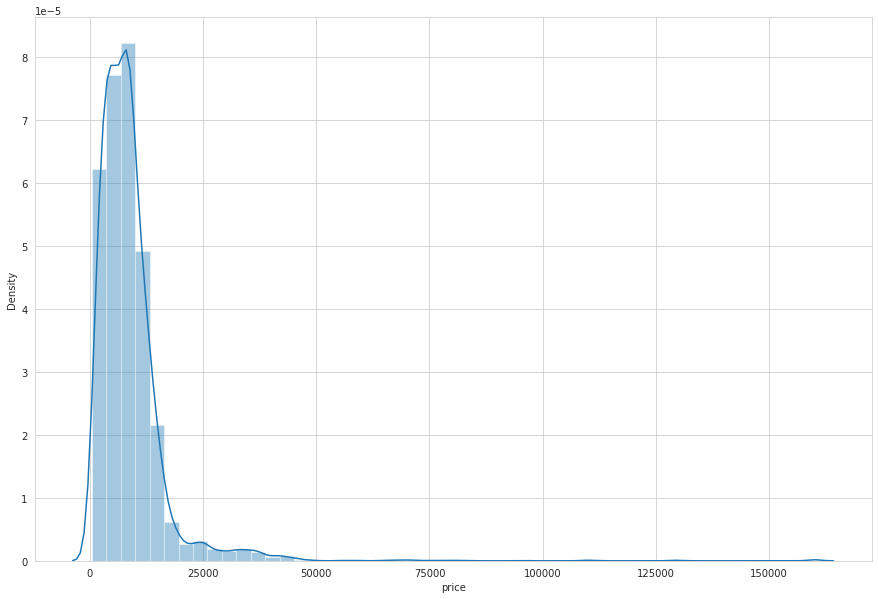

In [122]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(df.price)
plt.show()

<h2> Data correlation <h2>

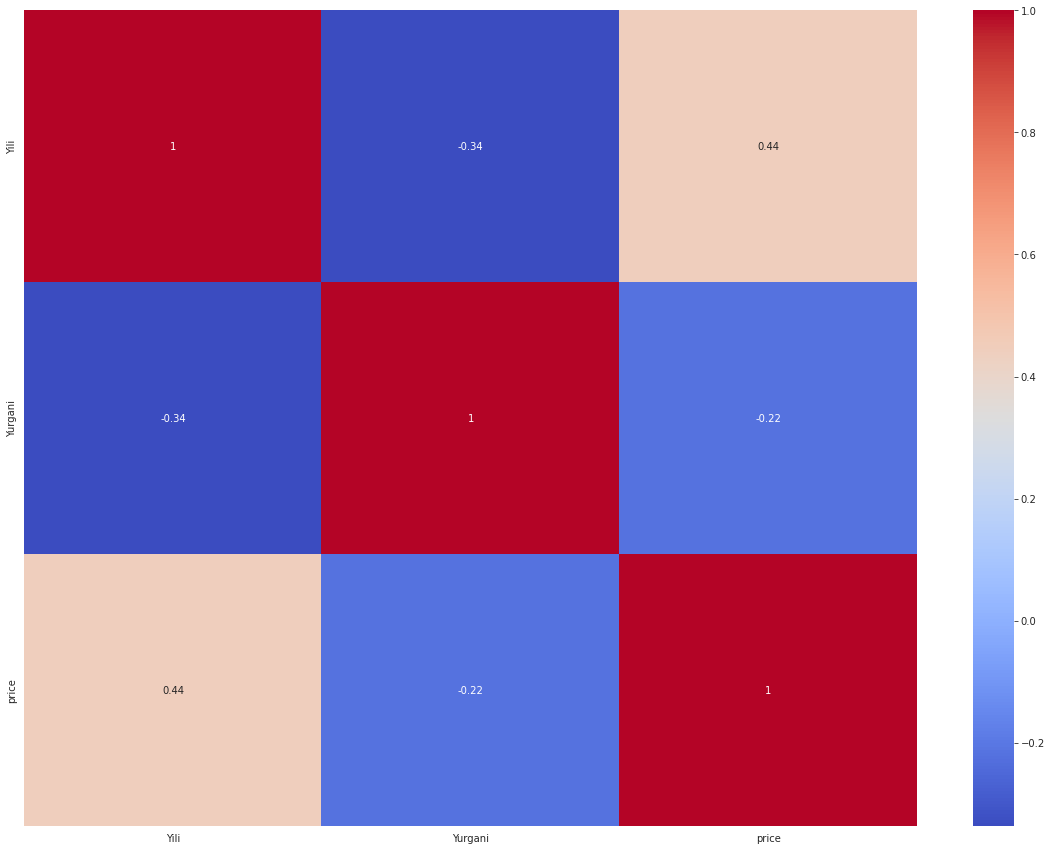

In [123]:
plt.figure(figsize=(20, 15))
correlations = df.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [124]:
x = df[["name","Yili","Yurgani"]]
x

,name,Yili,Yurgani
0,Chevrolet Spark,2013,66000.0
1,Chevrolet Cobalt,2019,46000.0
2,Chevrolet Cobalt,2014,132000.0
3,Chevrolet Captiva,2018,83000.0
4,Chevrolet Lacetti,2022,127.0
...,...,...,...
8013,Chevrolet Lacetti,2012,181000.0
8014,VAZ (Lada) Kalina,2008,250000.0
8015,Daewoo Tico,1997,448000.0
8016,Chevrolet Nexia 3,2020,25000.0


In [125]:
pd.get_dummies(x.name)
dummies = pd.get_dummies(x.name)

In [126]:
merged = pd.concat([x, dummies], axis = 1)
merged

,name,Yili,Yurgani,Audi 100,Audi 80,Audi 90,Audi A6,Audi A8,BMW 316,BMW 318,BMW 318i,BMW 320,BMW 324d,BMW 325,BMW 520,BMW 523,BMW 525,BMW 528,BMW 540,BMW 735,BMW M3,BMW X7,BYD Han EV,BYD Song Pro EV,Brilliance V5,Buick Velite 6,Chana Benni,Changan Alsvin,Changan Benni,Changan CX20,Changan SC6406,Changan SC6415,Changan SC6443,Changan Z-Shine,Chevrolet Aveo,Chevrolet Blazer,Chevrolet Captiva,Chevrolet Cobalt,Chevrolet Cruze,Chevrolet Damas,Chevrolet Epica,Chevrolet Equinox,Chevrolet Labo,Chevrolet Lacetti,Chevrolet Malibu,Chevrolet Malibu 2,Chevrolet Matiz,Chevrolet Matiz Best,Chevrolet Nexia 2,Chevrolet Nexia 3,Chevrolet Niva,Chevrolet Orlando,Chevrolet Spark,Chevrolet Suburban,Chevrolet Tacuma,Chevrolet Tahoe,Chevrolet Tracker,Chevrolet TrailBlazer,Chevrolet Traverse,Daewoo Damas,Daewoo Espero,Daewoo Gentra,Daewoo Kalos,Daewoo Labo,Daewoo Lacetti,Daewoo Leganza,Daewoo Matiz (Standart),Daewoo Matiz Best,Daewoo Matiz Creative,Daewoo Nexia,Daewoo Nexia II,Daewoo Prince,Daewoo Tico,Daihatsu Charada,Daihatsu Cuore,Dong Feng A30,Dong Feng DFSK K01H,Dong Feng EQ6380,FAW Bestune T77,Fiat Kartal,Fiat Tempra,Ford Courier,Ford E 350,Ford Escort,Ford Granada,Ford Scorpio,Ford Sierra,Ford Transit,GAZ 20 (Pobeda),GAZ 21 (Volga),GAZ 24 (Volga),GAZ 24011,GAZ 2410 (Volga),GAZ 2705 (GAZel),GAZ 3102 (Volga),GAZ 31029 (Volga),GAZ 3110 (Volga),GAZ 31105 (Volga),GAZ 32213 (GAZel),GAZ 3302 (GAZel Biznes),GAZ 69,GAZ GAZel Biznes,Hafei Brio,Hafei Lobo,Hafei Minyi,Hafei Princip,Honda Accord,Honda Asty,Honda CR-V,Honda Elysion,Honda FCX Clarity,Honda M-NV,Honda Odyssey,Hummer H3,Hyundai Accent,Hyundai Atos,Hyundai Avante,Hyundai Creta,Hyundai Elantra,Hyundai Galloper,Hyundai Grand Starex,Hyundai Grandeur,Hyundai Kona,Hyundai Porter,Hyundai Santa Fe,Hyundai Sonata,Hyundai Starex,Hyundai Tucson,Hyundai Tuscani,Hyundai i30,IJ 2125 Kombi,IJ 2715,Infiniti FX35,Isuzu D-Max,JAC J5 (Heyue),JAC M4,Jetour X70 Plus,Kia Bongo,Kia Carnival,Kia Forte,Kia K5,Kia Optima,Kia Seltos,Kia Sorento,Kia Topic,Lancia Beta,Land Rover Freelander,Land Rover Range Rover,Leap Motor C11,Lexus ES 300,Lexus GS 300,Lincoln Navigator,LuAZ 967,LuAZ 969М,Mazda 3,Mazda 323,Mazda 6,Mazda 626,Mazda AZ-Wagon,Mercedes-Benz 190,Mercedes-Benz C 180,Mercedes-Benz C 200,Mercedes-Benz C 220,Mercedes-Benz E 200,Mercedes-Benz E 220,Mercedes-Benz E 230,Mercedes-Benz E 240,Mercedes-Benz E 280,Mercedes-Benz E 320,Mercedes-Benz E 550,Mercedes-Benz ML 350,Mercedes-Benz S 280,Mercedes-Benz S 320,Mercedes-Benz S 350,Mercedes-Benz S 400,Mercedes-Benz S 550,Mercedes-Benz S 600,Mercedes-Benz Sprinter,Mercedes-Benz Vito,Mitsubishi Lancer,Mitsubishi Pajero,Moskvich 2141,Moskvich 21412,Moskvich 401,Moskvich 407,Moskvich 412,Moskvich 434,Moskvich AZLK 2136 Kombi,Moskvich AZLK 2137 Kombi,Moskvich AZLK 2140,Moskvich Svyatogor,NIO ES8,Neta Neta V,Nissan Altima,Nissan Laurel,Nissan Leaf,Nissan Maxima,Nissan Micra,Nissan Patrol,Nissan Stanza,Nissan Sunny,Nissan Sylphy EV Zero Emission,Nissan Teana,Nissan Tiida,Opel Combo,Opel Omega,Opel Rekord,Opel Vectra,Opel Vivaro,Opel Zafira,Pontiac Firebird,RAF 2203,Ravon Gentra,Ravon Matiz,Ravon Nexia R3,Ravon R2,Ravon R4,Renault Arkana,Renault Sandero,Renault Trafic,Skoda Kodiaq,Skywell ET5,SsangYong Estano,Tesla Model 3,Tesla Model X,Tofas Dogan,Toyota Alphard,Toyota Camry,Toyota Carina E,Toyota Corolla,Toyota Estima,Toyota HiAce,Toyota Land Cruiser,Toyota Land Cruiser Prado,Toyota Sienna,Toyota Yaris,UAZ 3151,UAZ 31512,UAZ 3159,UAZ 3303,UAZ 3962,UAZ 452,UAZ 469,UAZ Hunter,UAZ Patriot,VAZ (Lada) 2101,VAZ (Lada) 2102,VAZ (Lada) 2103,VAZ (Lada) 2104,VAZ (Lada) 2105,VAZ (Lada) 2106,VAZ (Lada) 2107,VAZ (Lada) 2110,VAZ (Lada) 2112,VAZ (Lada) Granta,VAZ (Lada) Kalina,VAZ (Lada) Kalina 2,VAZ (Lada) Largus,VAZ (Lada) Niva,VAZ (Lada) Niva 2123,VAZ (Lada) Niva 5-ta eshikli,VAZ (Lada) Priora,VAZ (Lada) Samara (hatchback 2108),VAZ (Lada) Samara (hatchback 2109),VAZ (Lada) Samara 2 (hatchback 2113),VAZ (Lada) Samara 2 (hatchback 2114),VAZ (Lada) Vesta,VAZ (Lada) Vesta Sport,VAZ (Lada) XRAY,

In [128]:
x_final = merged.drop(['name'], axis = 1)
x_final

,Yili,Yurgani,Audi 100,Audi 80,Audi 90,Audi A6,Audi A8,BMW 316,BMW 318,BMW 318i,BMW 320,BMW 324d,BMW 325,BMW 520,BMW 523,BMW 525,BMW 528,BMW 540,BMW 735,BMW M3,BMW X7,BYD Han EV,BYD Song Pro EV,Brilliance V5,Buick Velite 6,Chana Benni,Changan Alsvin,Changan Benni,Changan CX20,Changan SC6406,Changan SC6415,Changan SC6443,Changan Z-Shine,Chevrolet Aveo,Chevrolet Blazer,Chevrolet Captiva,Chevrolet Cobalt,Chevrolet Cruze,Chevrolet Damas,Chevrolet Epica,Chevrolet Equinox,Chevrolet Labo,Chevrolet Lacetti,Chevrolet Malibu,Chevrolet Malibu 2,Chevrolet Matiz,Chevrolet Matiz Best,Chevrolet Nexia 2,Chevrolet Nexia 3,Chevrolet Niva,Chevrolet Orlando,Chevrolet Spark,Chevrolet Suburban,Chevrolet Tacuma,Chevrolet Tahoe,Chevrolet Tracker,Chevrolet TrailBlazer,Chevrolet Traverse,Daewoo Damas,Daewoo Espero,Daewoo Gentra,Daewoo Kalos,Daewoo Labo,Daewoo Lacetti,Daewoo Leganza,Daewoo Matiz (Standart),Daewoo Matiz Best,Daewoo Matiz Creative,Daewoo Nexia,Daewoo Nexia II,Daewoo Prince,Daewoo Tico,Daihatsu Charada,Daihatsu Cuore,Dong Feng A30,Dong Feng DFSK K01H,Dong Feng EQ6380,FAW Bestune T77,Fiat Kartal,Fiat Tempra,Ford Courier,Ford E 350,Ford Escort,Ford Granada,Ford Scorpio,Ford Sierra,Ford Transit,GAZ 20 (Pobeda),GAZ 21 (Volga),GAZ 24 (Volga),GAZ 24011,GAZ 2410 (Volga),GAZ 2705 (GAZel),GAZ 3102 (Volga),GAZ 31029 (Volga),GAZ 3110 (Volga),GAZ 31105 (Volga),GAZ 32213 (GAZel),GAZ 3302 (GAZel Biznes),GAZ 69,GAZ GAZel Biznes,Hafei Brio,Hafei Lobo,Hafei Minyi,Hafei Princip,Honda Accord,Honda Asty,Honda CR-V,Honda Elysion,Honda FCX Clarity,Honda M-NV,Honda Odyssey,Hummer H3,Hyundai Accent,Hyundai Atos,Hyundai Avante,Hyundai Creta,Hyundai Elantra,Hyundai Galloper,Hyundai Grand Starex,Hyundai Grandeur,Hyundai Kona,Hyundai Porter,Hyundai Santa Fe,Hyundai Sonata,Hyundai Starex,Hyundai Tucson,Hyundai Tuscani,Hyundai i30,IJ 2125 Kombi,IJ 2715,Infiniti FX35,Isuzu D-Max,JAC J5 (Heyue),JAC M4,Jetour X70 Plus,Kia Bongo,Kia Carnival,Kia Forte,Kia K5,Kia Optima,Kia Seltos,Kia Sorento,Kia Topic,Lancia Beta,Land Rover Freelander,Land Rover Range Rover,Leap Motor C11,Lexus ES 300,Lexus GS 300,Lincoln Navigator,LuAZ 967,LuAZ 969М,Mazda 3,Mazda 323,Mazda 6,Mazda 626,Mazda AZ-Wagon,Mercedes-Benz 190,Mercedes-Benz C 180,Mercedes-Benz C 200,Mercedes-Benz C 220,Mercedes-Benz E 200,Mercedes-Benz E 220,Mercedes-Benz E 230,Mercedes-Benz E 240,Mercedes-Benz E 280,Mercedes-Benz E 320,Mercedes-Benz E 550,Mercedes-Benz ML 350,Mercedes-Benz S 280,Mercedes-Benz S 320,Mercedes-Benz S 350,Mercedes-Benz S 400,Mercedes-Benz S 550,Mercedes-Benz S 600,Mercedes-Benz Sprinter,Mercedes-Benz Vito,Mitsubishi Lancer,Mitsubishi Pajero,Moskvich 2141,Moskvich 21412,Moskvich 401,Moskvich 407,Moskvich 412,Moskvich 434,Moskvich AZLK 2136 Kombi,Moskvich AZLK 2137 Kombi,Moskvich AZLK 2140,Moskvich Svyatogor,NIO ES8,Neta Neta V,Nissan Altima,Nissan Laurel,Nissan Leaf,Nissan Maxima,Nissan Micra,Nissan Patrol,Nissan Stanza,Nissan Sunny,Nissan Sylphy EV Zero Emission,Nissan Teana,Nissan Tiida,Opel Combo,Opel Omega,Opel Rekord,Opel Vectra,Opel Vivaro,Opel Zafira,Pontiac Firebird,RAF 2203,Ravon Gentra,Ravon Matiz,Ravon Nexia R3,Ravon R2,Ravon R4,Renault Arkana,Renault Sandero,Renault Trafic,Skoda Kodiaq,Skywell ET5,SsangYong Estano,Tesla Model 3,Tesla Model X,Tofas Dogan,Toyota Alphard,Toyota Camry,Toyota Carina E,Toyota Corolla,Toyota Estima,Toyota HiAce,Toyota Land Cruiser,Toyota Land Cruiser Prado,Toyota Sienna,Toyota Yaris,UAZ 3151,UAZ 31512,UAZ 3159,UAZ 3303,UAZ 3962,UAZ 452,UAZ 469,UAZ Hunter,UAZ Patriot,VAZ (Lada) 2101,VAZ (Lada) 2102,VAZ (Lada) 2103,VAZ (Lada) 2104,VAZ (Lada) 2105,VAZ (Lada) 2106,VAZ (Lada) 2107,VAZ (Lada) 2110,VAZ (Lada) 2112,VAZ (Lada) Granta,VAZ (Lada) Kalina,VAZ (Lada) Kalina 2,VAZ (Lada) Largus,VAZ (Lada) Niva,VAZ (Lada) Niva 2123,VAZ (Lada) Niva 5-ta eshikli,VAZ (Lada) Priora,VAZ (Lada) Samara (hatchback 2108),VAZ (Lada) Samara (hatchback 2109),VAZ (Lada) Samara 2 (hatchback 2113),VAZ (Lada) Samara 2 (hatchback 2114),VAZ (Lada) Vesta,VAZ (Lada) Vesta Sport,VAZ (Lada) XRAY,VAZ (

In [129]:
y_final = df["price"]
y_final

0        6300
1       10000
2        8700
3       28500
4       15200
        ...  
8013     8772
8014     4000
8015     2500
8016    10200
8018     4300
Name: price, Length: 6714, dtype: int64

In [130]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_final, y_final, test_size=0.2)

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
Linear_model = LinearRegression()
Linear_model.fit(xtrain,ytrain)
predictions = Linear_model.predict(xtest)


array([ 5898.60110803,  1324.75667488,  5015.84666722, ...,
        2022.52344066,  9380.79178265, 11733.44439958])

In [135]:
Linear_model.score(xtest,ytest)

0.8271378582123176

TypeError: ignored